<img src="https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview-600x245.png" />

# Next Word Prediction 

### Introduction to Next Word Prediction: Training an RNN with Tensorflow and Keras
Next word prediction is a fascinating application of natural language processing (NLP) that aims to predict the most probable word following a given sequence of words in a sentence or text. This technology has become increasingly prevalent in various applications, such as text generation, autocomplete suggestions, and chatbots. By leveraging the power of Tensorflow, a popular machine learning framework, and the Keras library, we can train a Recurrent Neural Network (RNN) to effectively predict the next word in a sentence.

The RNN architecture is particularly suitable for sequential data like sentences, as it can capture dependencies and patterns in the sequence. With each word as input, the RNN model processes the preceding words and learns the context to make predictions about the subsequent word. This context-based approach allows for more accurate and contextually relevant predictions.

Tensorflow, a flexible and efficient deep learning library, provides a comprehensive ecosystem for building and training neural networks. Its integration with Keras, a user-friendly deep learning library, allows for seamless development and training of RNN models. The combination of Tensorflow and Keras enables both beginners and experienced practitioners to implement and experiment with next word prediction models quickly.

Training an RNN for next word prediction involves preprocessing the text data, creating a vocabulary, and preparing the training examples. The RNN model is then designed and trained using Tensorflow and Keras, taking into account hyperparameter tuning and optimization techniques. Through the training process, the RNN learns the language patterns and dependencies, enabling it to make accurate predictions about the next word given a sequence of words.

Next word prediction has numerous applications across different domains. It can be used to improve the efficiency and accuracy of text generation, assist in writing assistance tools, enhance autocomplete suggestions, and empower chatbots to generate more contextually relevant responses.

By utilizing Tensorflow and the Keras library, individuals can delve into the exciting field of next word prediction and develop models that generate coherent and contextually appropriate text. This technology opens up possibilities for automating and enhancing language-related tasks, providing users with more efficient and personalized experiences in various applications where accurate prediction of the next word is crucial.

In [2]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
medium_data = pd.read_csv('medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [4]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [5]:
medium_data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [6]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

In [7]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [8]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [9]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68])

In [10]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)

Epoch 1/10
1515/1515 [==============================] - 105s 67ms/step - loss: 6.9931 - accuracy: 0.0843
Epoch 2/10
1515/1515 [==============================] - 103s 68ms/step - loss: 6.1723 - accuracy: 0.1388
Epoch 3/10
1515/1515 [==============================] - 104s 68ms/step - loss: 5.6727 - accuracy: 0.1675
Epoch 4/10
1515/1515 [==============================] - 103s 68ms/step - loss: 5.2066 - accuracy: 0.1925
Epoch 5/10
1515/1515 [==============================] - 106s 70ms/step - loss: 4.7666 - accuracy: 0.2156
Epoch 6/10
1515/1515 [==============================] - 106s 70ms/step - loss: 4.3439 - accuracy: 0.2454
Epoch 7/10
1515/1515 [==============================] - 107s 70ms/step - loss: 3.9482 - accuracy: 0.2830
Epoch 8/10
1515/1515 [==============================] - 106s 70ms/step - loss: 3.5717 - accuracy: 0.3328
Epoch 9/10
1515/1515 [==============================] - 107s 70ms/step - loss: 3.2185 - accuracy: 0.3864
Epoch 10/10
1515/1515 [==============================] 

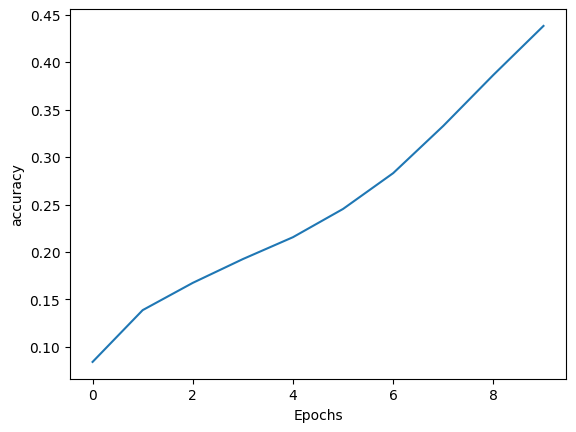

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
plot_graphs(history, 'accuracy')

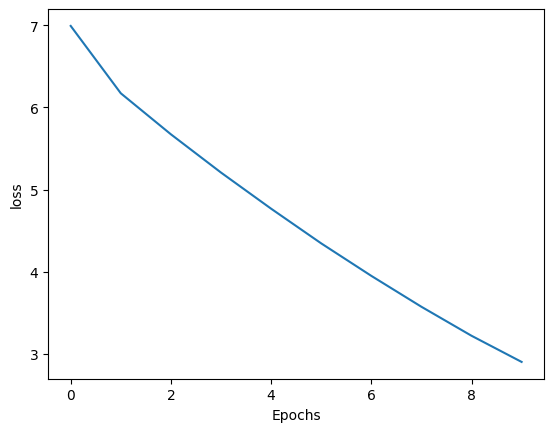

In [15]:
plot_graphs(history, 'loss')

In [19]:
seed_text = "implementation of"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)[0]
    predicted_index = np.argmax(predicted_probs)
    output_word = tokenizer.index_word[predicted_index]
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 14ms/step
implementation of a recovering


### Conclusion:
In conclusion, training a Recurrent Neural Network (RNN) for next word prediction using Tensorflow and the Keras library offers an exciting opportunity to delve into natural language processing. By leveraging the power of deep learning, this approach enables the model to learn and predict the most probable next word based on a given sequence of words.

Tensorflow provides a robust and efficient framework for building and training neural networks, while Keras offers a user-friendly interface that simplifies the development process. This combination makes it accessible for both beginners and experienced practitioners to explore and experiment with next word prediction models.

The RNN architecture is well-suited for sequential data, such as sentences, as it captures the contextual dependencies between words. By training the RNN on large text datasets, it can learn the language patterns and make accurate predictions about the next word in a given sequence.

Next word prediction has various applications, including text generation, autocomplete suggestions, and chatbots. By accurately predicting the next word, these applications can provide more efficient and contextually relevant user experiences.

By venturing into next word prediction with Tensorflow and Keras, individuals can gain a deeper understanding of natural language processing and develop models that generate coherent and meaningful text. This technology opens doors to advancements in automated language-related tasks and contributes to creating more personalized and interactive applications in diverse fields.